In [1]:
#| echo: false
from utils import build_buttons
from importlib import reload
import utils
reload(utils)
utils.build_buttons(link= 'browser_automation', 
                    github= 'https://github.com/yinleon/inspect-element/blob/main/browser_automation.ipynb',
                    colab = False,
                    citation= True)


<a type="button" class="btn btn-outline-primary btn-sm" target="_blank" href="https://inspectelement.org/browser_automation">📖 Read online</a>
<a type="button" class="btn btn-outline-primary btn-sm" target="_blank" href="https://github.com/yinleon/inspect-element/blob/main/browser_automation.ipynb">⚙️ GitHub</a>
<a type="button" class="btn btn-outline-primary btn-sm" target="_self" href="#citation">🏛 Citation</a>
<br>


Browser automation is a fundamental web scraping technique for building your own dataset.

It is essential for investigating personalization, working with rendered elements, and waiting for scripts and code to execute on a web page.

However, browser automation can be resource intensive and slow compared to other data collection approaches.

👉[Click here to jump to the Playwright tutorial](#tutorial).

# Intro

If you’ve tried to buy concert tickets to a popular act lately, you’ve probably watched in horror as the blue “available” seats evaporate before your eyes the instant tickets are released. Part of that may be pure ✨star power✨, but more than likely, bots were programmed to buy tickets to be resold at a premium.

These bots are programmed to act like an eager fan: waiting in the queue, selecting a seat, and paying for the show. These tasks can all be executed using browser automation.

**Browser automation** is used to programmatically interact with web applications. 

The most frequent use case for browser automation is to run tests on websites by simulating user behavior (mouse clicks, scrolling, and filling out forms). This is routine and invisible work that you wouldn’t remember, unlike seeing your dream of crowd surfing with your favorite musician disappear thanks to ticket-buying bots.

But browser automation has another use, one which _may_ make your dreams come true: web scraping.

Browser automation isn’t always the best solution for building a dataset, but it is necessary when you need to:

1. **Analyze rendered HTML**: see what's on a website as a user would.
2. **Simulate user behavior**: experiment with personalization and experience a website as a user would.
3. **Trigger event execution**: retrieve responses to JavaScript or [network requests](/apis.html) following an action.

These reasons are often interrelated. We will walk through case studies (below) that highlight at least one of these strengths, as well as why browser automation was a necessary choice.

Some popular browser automation tools are [Puppeteer](https://pptr.dev/), [Playwright](https://playwright.dev/), and [Selenium](https://www.selenium.dev/documentation/webdriver/elements/). 

## Headless Browsing

Browser automation can be executed in a "headless" state by some tools.

This doesn't mean that the browser is a ghost or anything like that, it just means that the _user interface_ is not visible.

One benefit of headless browsing is that it is less [resource intensive](/apis.html#case-study-on-scalability-collecting-internet-plans), however there is no visibility into what the browser is doing, making headless scrapers difficult to debug.

Luckily, some browser automation tools (such as Playwright) allow you to [toggle headless browsing](https://playwright.dev/python/docs/api/class-browsertype#browser-type-launch) on and off. Other tools, such as Puppeteer only allow you to use headless browsing.

If you’re new to browser automation, we suggest not using headless browsing off the bat. Instead try headed Playwright, which is exactly what we’ll do in the [tutorial](#tutorial) below (see the same tutorial in Selenium [here](/browser_automation_selenium)).

<figure>
<img src="assets/browser-automation.gif" width=100%></video><figcaption align = "left" style="font-size:80%;">Using Playwright to automate browsing TikTok's "For You" page for food videos.</figcaption>
</figure>

# Case Studies
## Case Study 1: Google Search
In the investigation “[Google the Giant](https://themarkup.org/google-the-giant/2020/07/28/google-search-results-prioritize-google-products-over-competitors),” The Markup wanted to measure how much of a Google Search page is “Google.” Aside from the daunting task of classifying what is "Google," and what is "not Google," the team of two investigative journalists-- Adrianne Jeffries and Leon Yin (a co-author of this section) needed to measure real estate on a web page.

The team developed a [targeted staining technique](https://themarkup.org/google-the-giant/2020/07/28/how-we-analyzed-google-search-results-web-assay-parsing-tool) inspired by the life sciences, originally used to highlight the presence of chemicals, compounds, or cancers. 

<figure>
<img src="assets/browser0_01_threestep1.png"
    alt="https://themarkup.org/google-the-giant/2020/07/28/how-we-analyzed-google-search-results-web-assay-parsing-tool#google-search-flow" 
     style="width:90%" 
    />
<figcaption align = "left" style="font-size:80%;"> 
Source: <a href="https://themarkup.org/google-the-giant/2020/07/28/how-we-analyzed-google-search-results-web-assay-parsing-tool">The Markup</a>
</figcaption>
</figure>

The reporters wrote over [68 web parsers](https://github.com/the-markup/investigation-google-search-audit/blob/master/utils/parsers.py) to identify elements on trending Google Search results as "Google," or three other categories. Once an element was identified, they could find the [coordinates](https://developer.mozilla.org/en-US/docs/Web/SVG/Element/rect) of each element along with its corresponding bounding box. Using the categorization and bounding box, The Markup were able to measure how many pixels were allocated to Google properties, as well as where they were placed on a down the page for a mobile phone.

<figure>
<img src="assets/browser0_02_soup1.png"
    alt="https://themarkup.org/google-the-giant/2020/07/28/how-we-analyzed-google-search-results-web-assay-parsing-tool#google-search-flow" 
     style="width:90%" 
     / >
<figcaption align = "left" style="font-size:80%;"> 
Source: <a href="https://themarkup.org/google-the-giant/2020/07/28/how-we-analyzed-google-search-results-web-assay-parsing-tool">The Markup</a>
</figcaption>
</figure>

Browser automation tools' ability to collect and analyze **rendered HTML pages** can be essential. This is especially the case for search results, since most search results contain modules, carousels, and other non-standardized rows and columns that are more complex than lists.

Rendered HTML can be used to analyze the allocation of real estate on a website, which can be a useful metric to gauge self-preferencing and [anti-competitive business practices](https://themarkup.org/amazons-advantage/2021/10/14/amazon-puts-its-own-brands-first-above-better-rated-products) relevant to [antitrust](https://themarkup.org/google-the-giant/2020/07/29/congressman-says-the-markup-investigation-proves-google-has-created-a-walled-garden).

## Case Study 2: Deanonymizing Google's Ad Network

Google ad sellers offer space on websites like virtual billboards, and are compensated by Google after an ad is shown. However, unlike physical ad sellers, almost all of the ~1.3 million ad sellers on Google are anonymous. To limit transparency further, multiple websites and apps can be monetized by the same seller, and it’s not clear which websites are part of Google’s ad network in the first place. 

As a result, [advertisers](https://checkmyads.org/branded/google-ads-has-become-a-massive-dark-money-operation/) and the public do not know who is making money from Google ads. Fortunately, watchdog groups, industry analysts, and reporters have developed methods to hold Google accountable for this oversight.

The methods boil down to triggering a JavaScript function that sends a request to Google to show an ad on a loaded web page. Importantly, the request reveals the seller ID used to monetize the website displaying the ad, and in doing so, links the seller ID to the website.

In 2022, reporters from ProPublica used Playwright to [automate this process](https://www.propublica.org/article/google-display-ads-piracy-porn-fraud) to visit 7 million websites and deanonymize over 900,000 Google ad sellers. Their investigation found some websites were able to monetize advertisements, despite breaking Google’s policies.

ProPublica's investigation used browser automation tools to **trigger event execution** to successfully load ads. Often, this required waiting a page to fully render, scrolling down to potential ad space, and browsing multiple pages. The reporters used a combination of network requests, rendered HTML, and cross-referencing screenshots to confirm that each website monetized ads from Google’s ad network.

Browser automation can help you trawl for clues, especially when it comes to looking for specific network requests sent to a central player by many different websites.

## Case Study 3: TikTok Personalization
An investigation conducted by the Wall Street Journal, "[Inside TikTok's Algorithm](https://www.wsj.com/articles/tiktok-algorithm-video-investigation-11626877477)" found that even when a user does not like, share, or follow any creators, TikTok still personalizes the "For You" page based on how long they watch the recommended videos.

In particular, the WSJ investigation found that users who watch content related to depression and skip other content are soon presented with mental health content and little else. Importantly, this effect happened even when the users did not explicitly like or share any videos, nor did they follow any creators. 

You can watch the WSJ's video showing how they mimic user behavior to study the effects of personalization:

<figure>
<video width=100% controls loop>
  <source src="assets/wsj_tiktok.mp4">
</video><figcaption align = "left" style="font-size:80%;">Source: WSJ</figcaption>
</figure>


This investigation was possible only after **simulating user behavior** and triggering personalization from TikTok's "For You" recommendations.

# Tutorial
In the hands-on tutorial we will attempt to study personalization on TikTok with a mock experiment. 

We’re going to teach you the basics of browser automation in Playwright, but the techniques we'll discuss could be used to study any other website using any other automation tool.

We will try to replicate elements of the WSJ investigation and see if we can trigger a personalized "For You" page. Although the WSJ ran their investigation using an Android on a Raspberry Pi, we will try our luck with something you can run locally on a personal computer using browser automation.

In this tutorial we'll use Playwright to watch TikTok videos where the description mentions keywords of our choosing, while skipping all others. In doing so, you will learn practical skills such as:

* Setting up the automated browser in Python
* Finding particular elements on the screen, extracting their content, and interacting with them
* Scrolling
* Taking screenshots

Importantly, we’ll be watching videos with lighter topics than depression (the example chosen in the WSJ investigation.).

::: {.callout-tip}
#### Pro tip: Minimizing harms
When developing the data collection methodology for an audit or investigation, start with low-stakes themes. This minimizes your exposure to harmful content and avoids boosting their popularity, unnecessarily.
:::

## Step 1: Installing playwright
Playwright will take care of finding and installing the browser binary that's suitable for your operating system. Such setup is much more straightforward than [Selenium](https://selenium-python.readthedocs.io/), which requires the user to manage each browser version.

The first line below installs the Python library, the second line installs the browser binaries.

In [2]:
!pip install playwright
!playwright install

Let's see if the installation worked correctly! Run the cell below to open a new Firefox window. We're going to use Firefox in this tutorial because Playwright's default browser (Chromium) does not support video playback in TikTok's format.


In [25]:
from playwright.async_api import async_playwright

# Start the browser
playwright = await async_playwright().start()
browser = await playwright.firefox.launch(headless=False)

# Create a new browser window
page = await browser.new_page()

# Open the default tiktok For You page
await page.goto("https://www.tiktok.com/foryou")

<Response url='https://www.tiktok.com/foryou' request=<Request url='https://www.tiktok.com/foryou' method='GET'>>

::: {.callout-note}
What is `await`? We're running Playwright in [asynchronous](https://realpython.com/python-async-features/#understanding-asynchronous-programming) mode, which is compatible with Jupyter Notebooks. You can run Playwright synchronously as a **script**, but not as a notebook. In practice you'll want to twinkler and iterate, so a notebook is preferred.

We explicitly call `await` after each line of code so that each command is run sequentially. Otherwise, every line of code runs at the same time.
:::

If everything works fine and you have the browser with TikTok open, our setup is complete!

Unfortunately, depending on your system this setup might not work:
* It will not work at all in Google Colab - you need to run this on your own machine
* It might not work on a Windows machine. If you're using Windows, you will need to downgrade your `ipykernel` to a version that supports Playwright. Uncomment the next code cell and run it, then restart this notebook:

In [ ]:
## Only uncomment and run the next line if you're using windows and the cell above did not give you an open browser window.
#!pip install ipykernel==6.28.0

## Step 2: Finding elements on page and interacting with them

We will perform our mock experiment without logging in (but we will also learn how to create multiple accounts and how to log in later).

Press the arrow down button on your keyboard a few times until a dialog pops up asking you do log in:

![](assets/browser1_02_tiktok1.png "tiktok main page")

Instead of logging in, our first interaction will be to click the "Continue as guest" button.

Playwright has built-in tools called [Locators](https://playwright.dev/python/docs/locators) to find and interact with elements on the page. One helpful locator is [based on the text]((https://playwright.dev/python/docs/api/class-page#page-get-by-text)) of a button you want to press. We can use the `get_by_text` locator to find the button that says "Continue as guest" on the `page` and click it:

In [26]:
await page.get_by_text("Continue as guest").click()

If Playwright successfully finds the button with the text you specified, it will be clicked. However, if Playwright **does not** find the element -- because the element hasn't loaded yet or you misspelled the text, you will get a `TimeoutError`. 

This error is thrown because Playwright waits a short period of time for an element to appear on screen. The default is 30,000 milliseconds (30 seconds). You can specify a different timeout as an argument to `click()`, for example 1,000 milliseconds (1 second):
```python
await page.get_by_text("Continue as guest").click(timeout = 1000)
```

Did you notice a change on the page? Congratulations! You just automated the browser to click something.

## Step 4: Scrolling

We now have a browser instance open and displaying the For You page. Let's scroll through the videos.

If you are a *real person* who (for whatever reason) visits TikTok on their computer, you could press the down key the keyboard to see new videos. We will do that programmatically using a [virtual keyboard](https://playwright.dev/docs/api/class-keyboard) instead:

In [27]:
await page.keyboard.press("ArrowDown")

When you run the cell above you will see that your browser scrolls down to the next video.

## Step 5: Finding TikTok videos on the page

Now that we have the building blocks for swiping through the For You page, let's view the recommended TikTok videos and parse out information (called metadata) for each video.

When we asked Playwright to search for the "Continue as guest" button (Step 3), we used a locator function based on text. Playwright had other [locator](https://playwright.dev/python/docs/locators) functions to find what you're looking for:

- get_by_role() to locate by explicit and implicit accessibility attributes.
- get_by_text() to locate by text content.
- get_by_label() to locate by the associated label's text.
- get_by_placeholder() to locate an input by placeholder.
- get_by_alt_text() to locate an element, usually image, by its text alternative.
- get_by_title() to locate an element by its title attribute.

The developers suggest using these recommended locators. This will make your code more legible and reliable. Other browser automation tools have comparable functions.

Unfortunately for us, none of these will work for our task. If you look at the source code for TikTok videos, you won't find any of these locators useful. However, there are fields that we can use to identify videos another way.

1. Right click on the white space around a TikTok video and choose "Inspect".
![Inspect Element](assets/browser1_05_inspect_tiktok_a1.png)
2. Hover your mouse over the surrounding `<div>` elements and observe the highlighted elements on the page to see which ones correspond to each TikTok video.
![Inspect Element](assets/browser1_05_inspect_tiktok_b1.png)
3. You will see that each video is in a separate `<div>` container but each of these containers has the same [data attribute](https://developer.mozilla.org/en-US/docs/Web/HTML/Global_attributes/data-*) (`data-e2e`) with the value of `recommend-list-item-container`.
4. We can now use this to find all videos on page (you can search by attribute value using square brackets):

Playwright has a generic `locator` function that accepts both xpath and CSS [selectors](https://playwright.dev/python/docs/locators#locate-by-css-or-xpath).

The same `<div>` can be identified in xpath as `//div[@data-e2e="recommend-list-item-container"]` or as a CSS selector as `[data-e2e="recommend-list-item-container"]`.

In [31]:
videos = await page.locator('//div[@data-e2e="recommend-list-item-container"]').all()
videos

[<Locator frame=<Frame name= url='https://www.tiktok.com/foryou'> selector='//div[@data-e2e="recommend-list-item-container"] >> nth=0'>,
 <Locator frame=<Frame name= url='https://www.tiktok.com/foryou'> selector='//div[@data-e2e="recommend-list-item-container"] >> nth=1'>,
 <Locator frame=<Frame name= url='https://www.tiktok.com/foryou'> selector='//div[@data-e2e="recommend-list-item-container"] >> nth=2'>,
 <Locator frame=<Frame name= url='https://www.tiktok.com/foryou'> selector='//div[@data-e2e="recommend-list-item-container"] >> nth=3'>,
 <Locator frame=<Frame name= url='https://www.tiktok.com/foryou'> selector='//div[@data-e2e="recommend-list-item-container"] >> nth=4'>,
 <Locator frame=<Frame name= url='https://www.tiktok.com/foryou'> selector='//div[@data-e2e="recommend-list-item-container"] >> nth=5'>,
 <Locator frame=<Frame name= url='https://www.tiktok.com/foryou'> selector='//div[@data-e2e="recommend-list-item-container"] >> nth=6'>,
 <Locator frame=<Frame name= url='https:/

When we searched for the "Continue as guest" button we didn't need to use the `all` method because we were only expecting one element to match our locator.

Now we're trying to find **all** videos on page, so we will chain the `locator` and `all` functions to return a full list of elements that match the locator.

## Step 6: Parsing TikTok metadata
With all the TikTok `videos` on the page, let's extract the description from each. Later, we'll use this metadata to decide whether to watch a video, or to skip it. The process of extracting a specific field from a webpage is "parsing".

1. Pick any description, right click, "Inspect". 
2. Let's locate the `<div>` that contains the whole description (including any hashtags) and make note of its `data` attribute.
3. Now let's write the code that extracts the description from a single video. You can get the text of any located element by calling the `inner_text` function.

In [34]:
for video in videos:
    print(await video.locator('//div[@data-e2e="video-desc"]').inner_text())

Unbelievable fish trap technique #fish  #fishing  #fishinglife  #wild  #wildlife  #nature  #asmr  #river  #fyp   
Super winner! Whoever clears the board first wins👌Sling Puck Game #viral  #viralvideo  #2024 #satisfying 
Head on to your nearest retail store and spot the 900g promo pack! Prepare your child for all school age challenges with NIDO!*Applicable on select retail stores nationwide.
#india  #streetfood  #food  #fpy  #foryou  #longervideos  
Jajaja YO NO SOY LA QUE REACCIONA, es una nena que se muere por el juhador  #richardRios  #colombia  
Every car needs this!🤯 #lifehack  #cars  #diy  #sports  
This was insane 🫣🤣
How North Korea is Now Impossible to Escape 🇰🇵🇰🇷 #northkorea  #korea  #southkorea  #northkoreafact  #northkorealife  #border  #maps  #geography  #learn  #history  #geotok  #historytok  #funfacts  #fyp 
Geeze im tired of hurting 
#momsoftiktok  #baseketball  #nba  #tiktok  #fyp  #foryou  
should dweeb count? 🤣 #trivia  
Apple watch hidden camera

Nah fam. I’m not for 

::: {.callout-note}
Note: We previously searched for elements using `page.locator()`. That allowed us to search the whole page. Here we're using a locator within a previously located element: `video.locator()`. This allows us to access attributes and elements **within an element on the page**, rather than on the whole page.
:::

## Step 7: Finding the TikTok video that's currently playing
We know how to scroll to the next video, and we know how to find all videos that are loaded.
At this point we could either:

a. Assume that at the beginning, the 0th video is playing, and then every time we press arrow down, the next video is being displayed<br>
b. Or, assume that the arrow down does not always work and each time verify which video is actually playing

The problem with the first approach is that even if scrolling fails just once, our experiment will be compromised (after it happens we will be watching and skipping different videos that our script tells us). This is why we will go with the second approach and verify which video is actually playing. Back to our favorite tool- inspect element!

When you right click on the playing video, you will see that instead of our familiar UI we get a custom TikTok menu, so that won't work. Try right-clicking on the description of the video instead, then hovering over different elements in the inspector and expanding the one that highlights the video in the browser. Dig deep until you get to the `div` that only contains the video. 

Still in the inspector try looking at the video below. You will see that the `div` that contains the video is missing and there is no element with the tag name `video`. That's how we can find if the video is currently playing - its `div` will contain the `video` element that we can find by `TAG_NAME` <- ???:

In [15]:
for video in videos:
    # let's get the description of each video using the method we already know
    description = await video.locator('//div[@data-e2e="video-desc"]').inner_text()

    # now let's count all the <video> elements within. If there is one, that's the one that's playing!
    if await video.locator('video').count() > 0:
        playing = 'playing'
    else:
        playing = 'not playing'
    print(playing, description)

not playing Unbelievable fish trap technique #fish  #fishing  #fishinglife  #wild  #wildlife  #nature  #asmr  #river  #fyp   
not playing Super winner! Whoever clears the board first wins👌Sling Puck Game #viral  #viralvideo  #2024 #satisfying 
playing Head on to your nearest retail store and spot the 900g promo pack! Prepare your child for all school age challenges with NIDO!*Applicable on select retail stores nationwide.
not playing #india  #streetfood  #food  #fpy  #foryou  #longervideos  
not playing Jajaja YO NO SOY LA QUE REACCIONA, es una nena que se muere por el juhador  #richardRios  #colombia  


## Step 8: Taking screenshots and saving page sources

You might want to save a screenshot to help debug your scraper or provide artifacts you can present alongside your findings.
Playwright allows you to take screenshots of the whole screen, or just a particular element:

In [16]:
# take a screenshot of the whole browser
await page.screenshot(path="screenshot.png")

# take a screenshot of just one video
screenshot = await video.screenshot(path="video_screenshot.png")

In the spirit of _bringing receipts_, you can also save the entire webpage as an HTML file to parse it later.

In [17]:
# save the source of the entire page
page_html = await page.content()
with open('webpage.html', 'w') as output:
    output.write(page_html)

::: {.callout-tip}
#### Pro tip: Keep these records to sanity check your results
Taking a screenshot and saving the page source is a useful practice for checking your work. Use the two to cross-reference what was visible in the browser and whatever data you end up extracting during the parsing step.
:::

Let's close the browser for now, and kick this workflow up a notch.

In [20]:
await browser.close()

## Step 9: Putting it all together
At this point, we can read the description of TikTok videos and navigate the "For You" page. 

That's most of the setup we need to try our mock experiment:<br>
let's watch all TikTok videos that mention food in the description and skip videos that do not mention food.

After one hundred videos, we will see whether we are served videos from FoodTok more frequently than other topics.

::: {.callout-tip}
#### Pro tip: Use functions!
So far we wrote code to open the browser, close the dialog, and find videos as separate cells in the notebook. We _could_ copy that code over here to use it, but it will be much easier to read and maintain the code if we write clean, well-documented functions with descriptive names.

Note: because we're running asynchronous Playwight we are using `async def` to [define functions](https://stackoverflow.com/a/53420574).
:::

In [21]:
from playwright.async_api import async_playwright, expect

async def open_browser():
    """
    Starts the automated browser and opens a new window
    """
    # Start the browser
    playwright = await async_playwright().start()
    browser = await playwright.firefox.launch(headless=False)

    # Create a new browser window
    page = await browser.new_page()

    return browser, page


async def close_login_dialog(page):
    """
    Checks if the login dialog is present. If so, it "Continues as guest"
    """
    # how many elements with "Continue as guest" do we see?
    if await page.get_by_text('Continue as guest').count() > 0:
        # there is one, let's click it!
        await page.get_by_text('Continue as guest').click()
    else:
        # there is none, we can continue scrolling
        return
    
async def find_videos(page):
    """
    Finds all tiktoks loaded in the browser
    """
    videos = await page.locator('//div[@data-e2e="recommend-list-item-container"]').all()
    return videos

async def get_description(video):
    """
    Extracts the video description along with any hashtags
    """
    try:
        description = await video.locator('//div[@data-e2e="video-desc"]').inner_text()
    except:
        # if the description is missing, just get any text from the video
        description = await video.inner_text()
    return description

async def get_current(videos):
    """
    Given the list of videos it returns the one that's currently playing
    """
    for video in videos:
        if await video.locator('video').count() > 0:
            # this one has the video, we can return it and that ends the function.
            return video
    
    return None

def is_target_video(description, keywords):
    """
    Looks for keywords in the given description. 
    NOTE: only looks for the substring IE partial match is enough.
    Returns `True` if there are any or `False` when there are none.
    """
    # check in any of the keywords is in the description
    for keyword in keywords:
        if keyword in description:
            # we have a video of interest, let's watch it 
            return True
    
    # if we're still here it means no keywords were found
    return False

async def screenshot(video, filename="screenshot.png"):
    """
    Saves a screenshot of a given video to a specified file
    """
    screenshot = await video.screenshot(path = filename)
    
async def save_source(page, filename='webpage.html'):
    """
    Saves the browser HTML to a file
    """
    page_html = await page.content()
    with open(filename, 'w') as output:
        output.write(page_html)

Ok, with that out of the way, let's set up our first data collection.

Let's make a directory to save screenshots. We will save screenshots here whenever we find a video related to food.

In [22]:
import os

os.makedirs('data/screenshots/', exist_ok=True)

In [23]:
browser, page = await open_browser()

# Open the default tiktok For You page
await page.goto("https://www.tiktok.com/foryou")

await expect(page.locator('video').first).to_be_visible()

In [24]:
import time

# if the description has any one these words, we will watch the video
keywords = ['food', 'dish', 'cook', 'pizza', 'recipe', 'mukbang', 'dinner', 'foodie', 'restaurant']

# this is where will we store decisions we take
decisions = []

# open a browser, and go to TikTok's For You page.
browser, page = await open_browser()

# Open the default tiktok For You page
await page.goto("https://www.tiktok.com/foryou")

# Let's wait for the first video to load before we start scrolling
await expect(page.locator('video').first).to_be_visible()

for tiktok_index in range(0, 100):
    # make sure to dismiss the login window
    await close_login_dialog(page)
    
    # get all videos
    tiktoks = await find_videos(page)
    
    # the current tiktok is the one that's currently showing the video player
    current_video = await get_current(tiktoks)
    
    if current_video is None:
        print('no more videos')
        break
              
    # read the description of the video
    description = await get_description(current_video)
    
    # categorize the video as relevant to `keywords` or not.
    contains_keyword = is_target_video(description, keywords)
    decisions.append(contains_keyword)
            
    print(tiktok_index, contains_keyword, description)
    
    if contains_keyword:
        # we have a video of interest, let's take a screenshot
        ## here we declare the files we'll save. they're named according to their order.
        fn_screenshot = f"data/screenshots/screenshot_{tiktok_index:05}.png"
        fn_page_source = fn_screenshot.replace('.png', '.html')
        await screenshot(current_video, fn_screenshot)
        await save_source(page, fn_page_source)
        # and now watch it for 30 seconds
        await page.wait_for_timeout(30000)
    
    # move to the next video
    await page.keyboard.press("ArrowDown")
    await page.wait_for_timeout(1000)
    
    
await browser.close()

0 False Super winner! Whoever clears the board first wins👌Sling Puck Game #viral  #viralvideo  #2024 #satisfying 
1 True #india  #streetfood  #food  #fpy  #foryou  #longervideos  
2 False Jajaja YO NO SOY LA QUE REACCIONA, es una nena que se muere por el juhador  #richardRios  #colombia  
3 False No sean esa persona 🥺 
4 False 02.07. Happy birthday #happybirthday  #nohea  #asmr  #satisfyingvideo  
5 False 
6 False Every car needs this!🤯 #lifehack  #cars  #diy  #sports  
7 False This was insane 🫣🤣
8 False #momsoftiktok  #baseketball  #nba  #tiktok  #fyp  #foryou  
9 False This is the story of Nasim Aghdam #youtube  #nasim  #truecrime  
10 False Geeze im tired of hurting 
11 False How North Korea is Now Impossible to Escape 🇰🇵🇰🇷 #northkorea  #korea  #southkorea  #northkoreafact  #northkorealife  #border  #maps  #geography  #learn  #history  #geotok  #historytok  #funfacts  #fyp 
12 False 
13 False Apple watch hidden camera
14 False 34 years later.. someone please tell me! #nostalgia  #90

::: {.callout-tip}
#### Pro tip: Be careful about keywords
For experiments that use `keywords`, the choices we make will directly shape our results. In the field, you can mitigate your own predisposition and biases by working with [domain experts to curate keyword lists](https://themarkup.org/google-the-giant/2021/04/09/how-we-discovered-googles-social-justice-blocklist-for-youtube-ad-placements#sourcing-social-justice-keywords).
:::

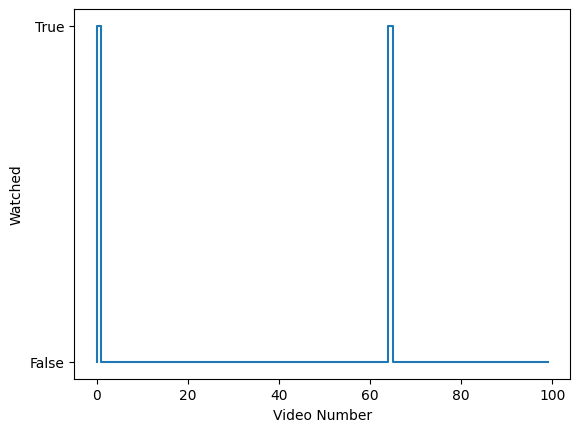

In [35]:
import matplotlib.pyplot as plt
plt.plot(decisions, ds='steps')
plt.xlabel('Video Number')
plt.ylabel('Watched')
plt.yticks([0, 1], ['False', 'True']);

The figure above shows when during our 100-videos-long session we were recommended a video about food (from `keywords`). The x-axis is chronological, the 1st video displayed is on the left, and the most recent video is on the right. The y-axis is "yes" or "no," depending on if the video was related to food. 

### Results

You can look back to the `data/screenshots` folder we created to check whether the videos we watched appear to be food-related. 

If the feed was indeed increasingly filled with food videos, we would see more lines towards the right of the graph. At least here it does not appear to be the case. 

Does it mean that the WSJ investigation was wrong, or that TikTok stopped personalizing content? 

The answer is "No," for several reasons: 

1. We only scrolled through 100 videos, this is likely too few to observe any effects. Try re-running with a higher number!<br>
2. When studying personalization you should use an account per profile and make sure you're logged in, rather than relying on a fresh browser. So, instead of closing the login dialog, try actually logging in! You know how to find and click buttons, and [this is how you put text in text fields](https://www.geeksforgeeks.org/send_keys-element-method-selenium-python/).<br>
3. When you're not logged in, you will be presented with content from all over the world, in all languages. If you filtered `keywords` in just one language, you will miss plenty of target content in other languages.<br>
4. You should always have a baseline to compare to. In this case, you should probably run two accounts at the same time - one that watches food videos and one that doesn't. Then you compare the prevalence of food videos between these two.<br>
5. The WSJ investigation was run on the mobile app rather than on a desktop browser. Perhaps TikTok's personalization works differently based on device or operating system.

## Advanced Usage

Above we highlighted some ideas to make your investigation or study more robust, some are methodological choices, but others are technical.

There are some advanced use-cases and tasks you can perform with browser automation that include

- Authentication using the browser and storing cookies for later use.<br>
- Intercept background [API](/apis.html) calls and combine browser automation with API calls. See [`selenium-wire`](https://pypi.org/project/selenium-wire/) as an example.<br>
- Signing in with one or more email addresses.<br>

We may cover some or all of these topics in subsequent tutorials, but you should feel free to experiment.

Let us know what you're interested in learning more about!

# Related Readings

More tutorials on the same subject:

- "[Using real browsers](https://scrapism.lav.io/using-real-browsers/)" - Sam Lavigne
- "[Scraping with Playwright - IRE 2024](https://github.com/jsoma/ire24-scraping?tab=readme-ov-file)" - Jonathan Soma

Notable investigations, audits, and tools using browser automation:

- "[Blacklight](https://themarkup.org/blacklight)" - a investigative tool by Surya Mattu<br>
- "[TheirTube](https://www.their.tube/)" - an art and advocacy project by Tomo Kihara<br>
- "[Worlds Apart](https://www.nrk.no/osloogviken/xl/tiktok-doesn_t-show-the-war-in-ukraine-to-russian-users-1.15921522)" - a TikTok investigation by Henrik Bøe and Christian Nicolai Bjørke<br>
- "[WebSearcher](https://github.com/gitronald/WebSearcher)" - A Python package by Ronald E. Robertson<br>
- "[Googling for Abortion](https://journalqd.org/article/view/2752)" - Yelena Mejova, Tatiana Gracyk, and Ronald E. Robertson<br>
- "[webXray](https://webxray.org/)" - A website forensics tool by Tim Liebert<br>
- "[OpenWPM](https://github.com/itdelatrisu/OpenWPM)" - A privacy-measurement tool

Please reach out with more examples to add.

# Citation

To cite this chapter, please use the following BibTex entry:

<pre>
@incollection{inspect2023browser,
  author    = {Sapiezynski, Piotr and Yin, Leon},
  title     = {Browser Automation},
  booktitle = {Inspect Element: A practitioner's guide to auditing algorithms and hypothesis-driven investigations},
  year      = {2023},
  editor    = {Yin, Leon and Sapiezynski, Piotr and Raji, Inioluwa Deborah},
  note      = {\url{https://inspectelement.org}}
}
</pre>

## Acknowledgements

Thank you to Ruth Talbot and John West for answering questions about their two respective investigations.